In [1]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile
import os

def unzip_to_specific_folder(data_path, target_folder):

    # Ensure the target folder exists
    os.makedirs(target_folder, exist_ok=True)

    try:
        with zipfile.ZipFile(data_path, 'r') as zip_ref:
            zip_ref.extractall(target_folder)
        print(f"Extraction complete. Files extracted to: {target_folder}")
    except zipfile.BadZipFile:
        print("Error: The file is not a valid ZIP archive.")
    except FileNotFoundError:
        print("Error: The specified ZIP file was not found.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

def load_csv(data_path):
  return pd.read_csv(data_path)


In [ ]:
data_path = "/content/drive/MyDrive/GRA/Datasets/EV Data/Hyundai Ioniq 5.zip"
# target_folder =  "/content/drive/MyDrive/GRA/Datasets/EV Data/Hyundai_Ioniq_5/"
# unzip_to_specific_folder(data_path, target_folder)

Extraction complete. Files extracted to: /content/drive/MyDrive/GRA/Datasets/EV Data/Hyundai_Ioniq_5/


In [18]:
csv_path = "/content/drive/MyDrive/GRA/Datasets/EV Data/Hyundai_Ioniq_5/Long/0_desired/35/0/1.csv"

csv_data = load_csv(csv_path)
csv_data.head()

,Unnamed: 0,Time,Speed Follower,Speed Leader,Smooth Speed Follower,Smooth Speed Leader,Spacing
0,0,2033.00,55.31,55.130,54.9484,55.1524,27.307067
1,1,2033.02,55.17,55.255,54.9588,55.1654,27.315506
2,2,2033.04,55.03,55.380,54.9626,55.1838,27.323949
3,3,2033.06,55.04,55.430,54.9658,55.2046,27.319727
4,4,2033.08,55.05,55.480,54.9726,55.2198,27.315506


In [19]:
csv_data.shape

(2651, 7)

In [20]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2651 non-null   int64  
 1   Time                   2651 non-null   float64
 2   Speed Follower         2651 non-null   float64
 3   Speed Leader           2651 non-null   float64
 4   Smooth Speed Follower  2651 non-null   float64
 5   Smooth Speed Leader    2651 non-null   float64
 6   Spacing                2651 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 145.1 KB


### Trend Analysis

In [30]:
df = csv_data.head(500)

In [31]:
df.shape

(500, 9)

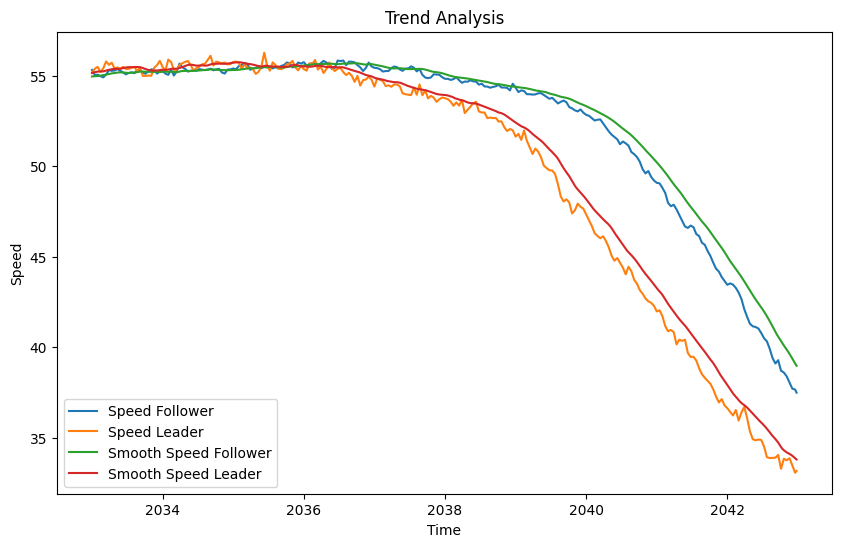

                Speed Follower  Speed Leader
Speed Follower        1.000000      0.964732
Speed Leader          0.964732      1.000000


<ipython-input-32-994af0beea08>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Speed_Follower_MA'] = df['Speed Follower'].rolling(window=5).mean()
<ipython-input-32-994af0beea08>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Speed_Leader_MA'] = df['Speed Leader'].rolling(window=5).mean()


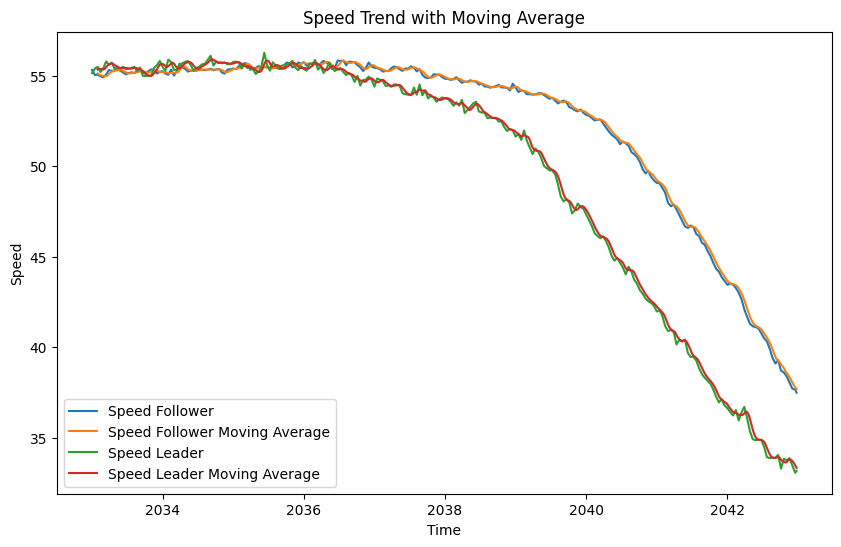

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the trends
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Speed Follower'], label='Speed Follower')
plt.plot(df['Time'], df['Speed Leader'], label='Speed Leader')
plt.plot(df['Time'], df['Smooth Speed Follower'], label='Smooth Speed Follower')
plt.plot(df['Time'], df['Smooth Speed Leader'], label='Smooth Speed Leader')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Trend Analysis')
plt.legend()
plt.show()

# Correlation analysis
correlation = df[['Speed Follower', 'Speed Leader']].corr()
print(correlation)

# Moving average calculation
df['Speed_Follower_MA'] = df['Speed Follower'].rolling(window=5).mean()
df['Speed_Leader_MA'] = df['Speed Leader'].rolling(window=5).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Speed Follower'], label='Speed Follower')
plt.plot(df['Time'], df['Speed_Follower_MA'], label='Speed Follower Moving Average')
plt.plot(df['Time'], df['Speed Leader'], label='Speed Leader')
plt.plot(df['Time'], df['Speed_Leader_MA'], label='Speed Leader Moving Average')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Speed Trend with Moving Average')
plt.legend()
plt.show()

In [33]:
# plot line plot on Speed follower and speed leader
import matplotlib.pyplot as plt

def plot_line_graph(df, columns):
    # Check if columns are provided
    if not columns:
        raise ValueError("The 'columns' parameter must contain at least one column name.")

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot each column
    for column in columns:
        plt.plot(df[column], label=column, marker="o",linewidth=0.5, markersize=1,linestyle='dashed')

    # Add labels, title, and legend
    plt.xlabel("Time (or Observation Index)")
    plt.ylabel("Speed (km/hr)")
    plt.title("Speed Comparison")
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

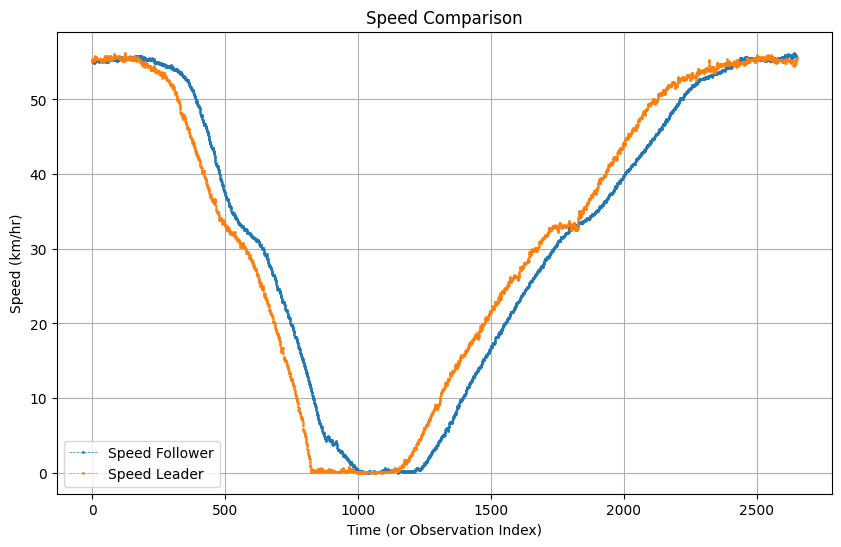

In [34]:
plot_line_graph(csv_data,['Speed Follower','Speed Leader'])

In [ ]:
def desired_speed_wise_line_graph(data_path):
  csv_data = load_csv(csv_path)
  plot_line_graph(csv_data,['Speed Follower','Speed Leader'])

In [ ]:
#/content/drive/MyDrive/GRA/Datasets/EV Data/Hyundai_Ioniq_5/Long/0_desired/35/0/1.csv
#/content/drive/MyDrive/GRA/Datasets/EV Data/Hyundai_Ioniq_5/Long/5_desired/35/0/1.csv
#/content/drive/MyDrive/GRA/Datasets/EV Data/Hyundai_Ioniq_5/Long/10_desired/35/0/1.csv

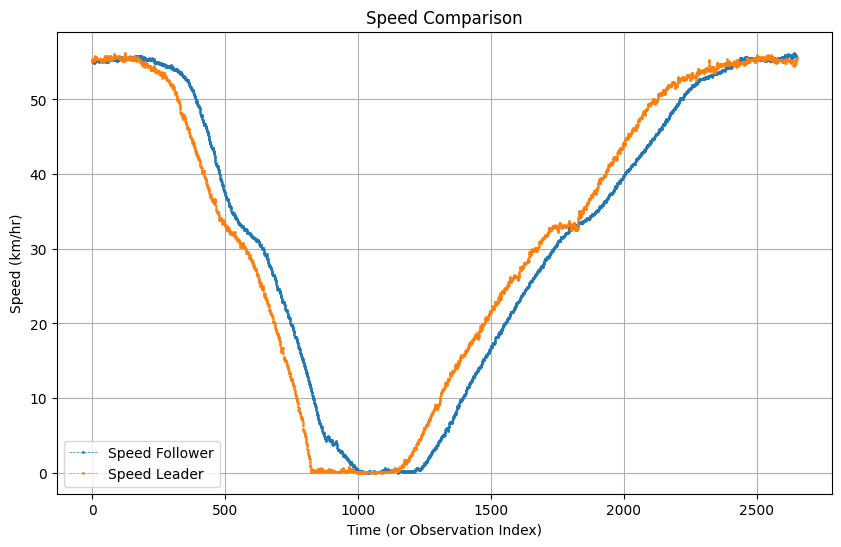

In [ ]:
desired_speed_wise_line_graph('/content/drive/MyDrive/GRA/Datasets/EV Data/Hyundai_Ioniq_5/Long/0_desired/35/0/1.csv')

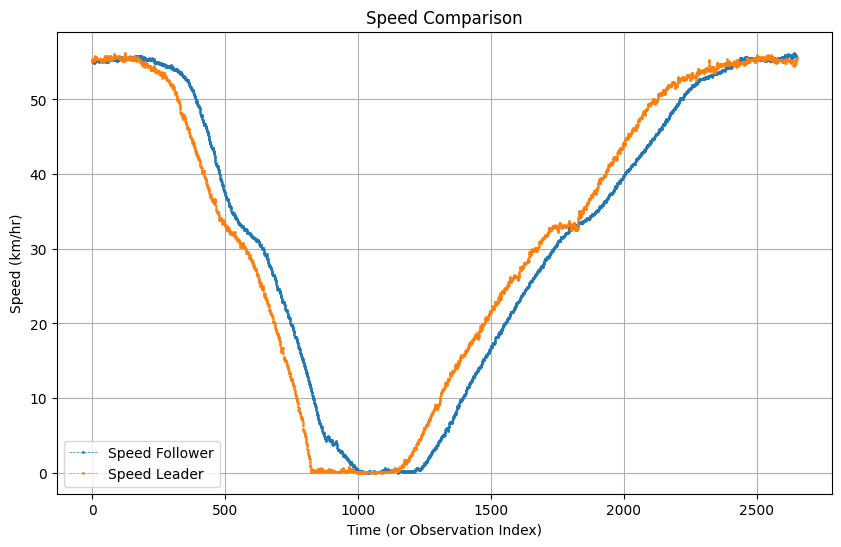

In [ ]:
desired_speed_wise_line_graph('/content/drive/MyDrive/GRA/Datasets/EV Data/Hyundai_Ioniq_5/Long/5_desired/35/0/1.csv')

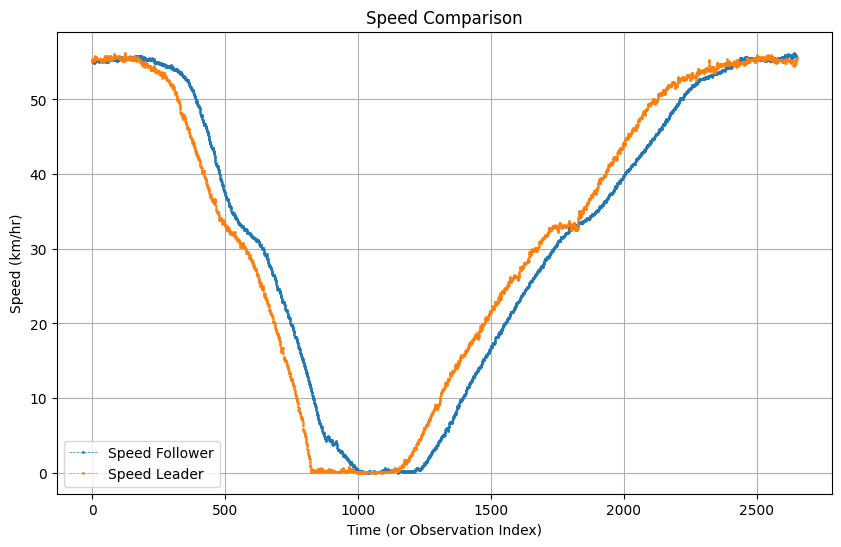

In [ ]:
desired_speed_wise_line_graph('/content/drive/MyDrive/GRA/Datasets/EV Data/Hyundai_Ioniq_5/Long/10_desired/35/0/1.csv')

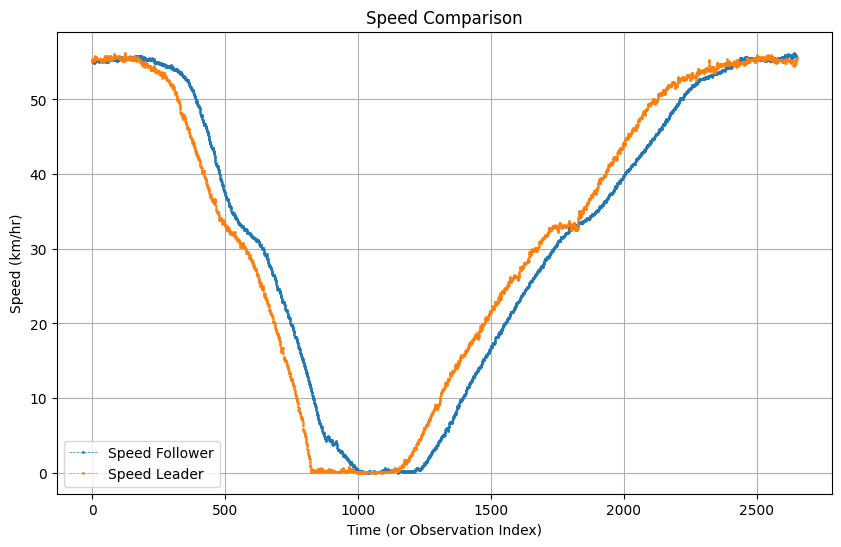

In [ ]:
desired_speed_wise_line_graph('/content/drive/MyDrive/GRA/Datasets/EV Data/Hyundai_Ioniq_5/XLong/5_desired/35/0/1.csv')

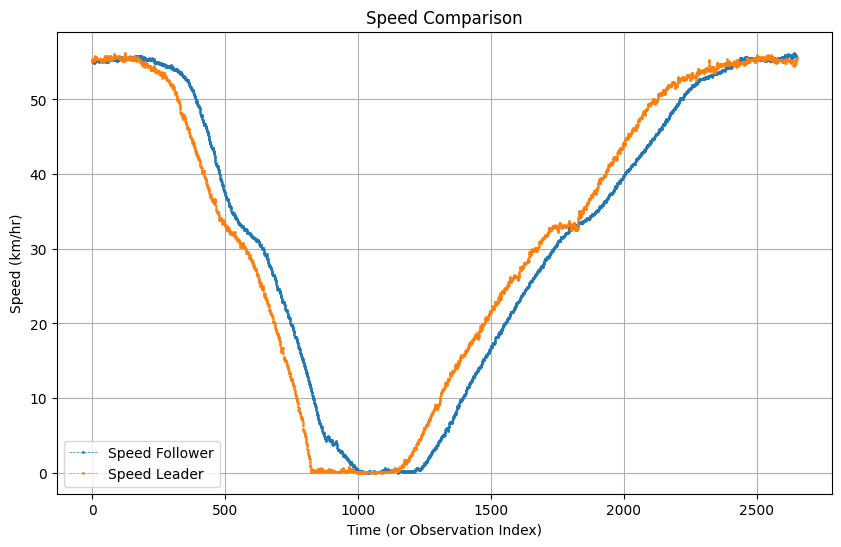

In [ ]:
desired_speed_wise_line_graph('/content/drive/MyDrive/GRA/Datasets/EV Data/Hyundai_Ioniq_5/XLong/0_desired/35/0/1.csv')

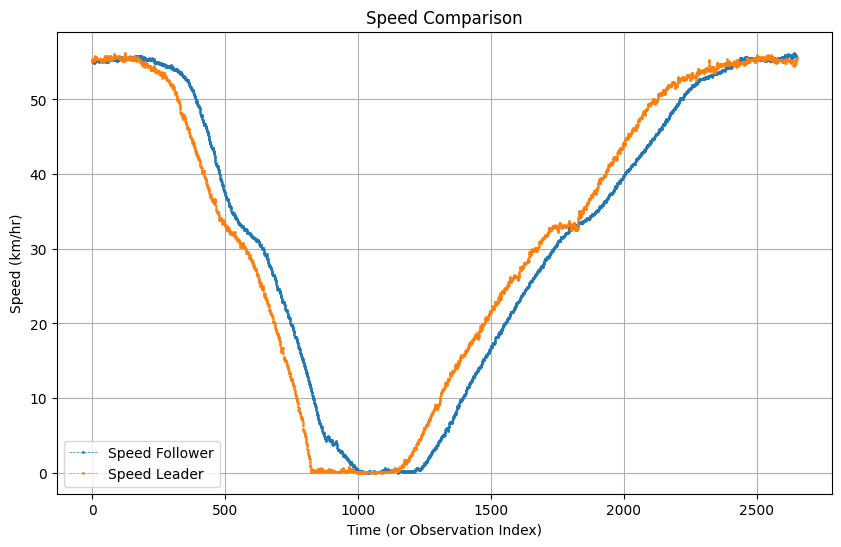

In [ ]:
desired_speed_wise_line_graph('/content/drive/MyDrive/GRA/Datasets/EV Data/Hyundai_Ioniq_5/XLong/10_desired/35/0/1.csv')

### Smoothing Effect


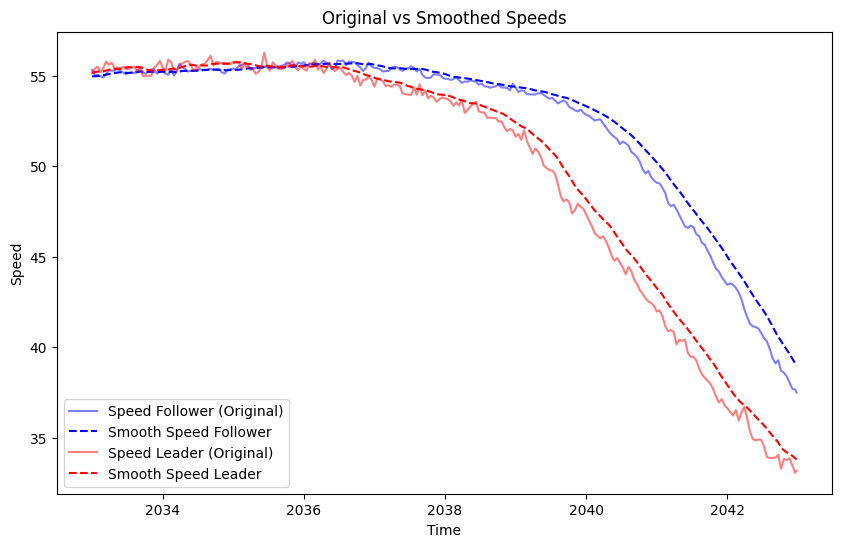

<ipython-input-35-e93cba3d050e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Residual Follower'] = df['Speed Follower'] - df['Smooth Speed Follower']
<ipython-input-35-e93cba3d050e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Residual Leader'] = df['Speed Leader'] - df['Smooth Speed Leader']


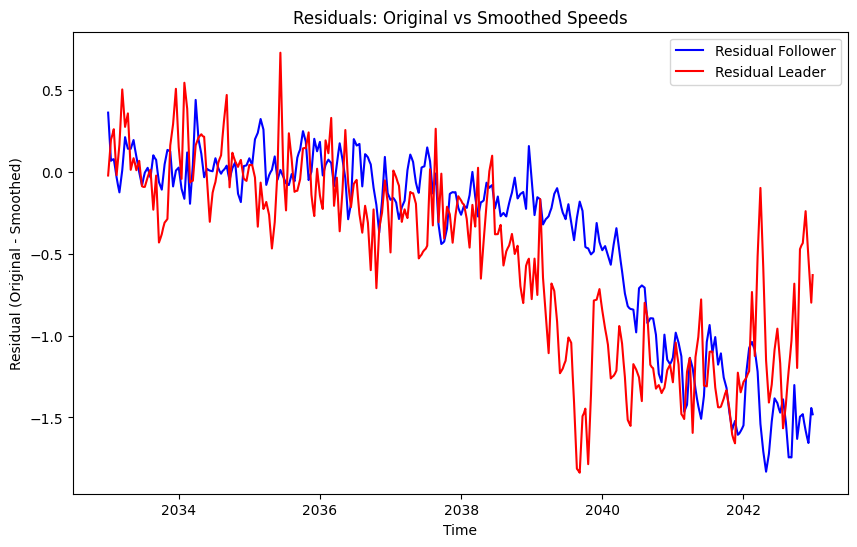

Follower - Original: {'Mean': 52.33482000000001, 'Std Dev': 4.8455760836835005}
Follower - Smoothed: {'Mean': 52.733548, 'Std Dev': 4.317871237661684}
Leader - Original: {'Mean': 49.72799, 'Std Dev': 7.243847704710398}
Leader - Smoothed: {'Mean': 50.244758000000004, 'Std Dev': 6.8153627831692445}


In [35]:
# Plotting original vs smoothed speeds
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Speed Follower'], label='Speed Follower (Original)', color='blue', alpha=0.5)
plt.plot(df['Time'], df['Smooth Speed Follower'], label='Smooth Speed Follower', color='blue', linestyle='--')
plt.plot(df['Time'], df['Speed Leader'], label='Speed Leader (Original)', color='red', alpha=0.5)
plt.plot(df['Time'], df['Smooth Speed Leader'], label='Smooth Speed Leader', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Original vs Smoothed Speeds')
plt.legend()
plt.show()

# Calculate residuals
df['Residual Follower'] = df['Speed Follower'] - df['Smooth Speed Follower']
df['Residual Leader'] = df['Speed Leader'] - df['Smooth Speed Leader']

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Residual Follower'], label='Residual Follower', color='blue')
plt.plot(df['Time'], df['Residual Leader'], label='Residual Leader', color='red')
plt.xlabel('Time')
plt.ylabel('Residual (Original - Smoothed)')
plt.title('Residuals: Original vs Smoothed Speeds')
plt.legend()
plt.show()

# Calculate mean and standard deviation
original_follower_stats = {
    'Mean': df['Speed Follower'].mean(),
    'Std Dev': df['Speed Follower'].std()
}

smoothed_follower_stats = {
    'Mean': df['Smooth Speed Follower'].mean(),
    'Std Dev': df['Smooth Speed Follower'].std()
}

original_leader_stats = {
    'Mean': df['Speed Leader'].mean(),
    'Std Dev': df['Speed Leader'].std()
}

smoothed_leader_stats = {
    'Mean': df['Smooth Speed Leader'].mean(),
    'Std Dev': df['Smooth Speed Leader'].std()
}

print("Follower - Original:", original_follower_stats)
print("Follower - Smoothed:", smoothed_follower_stats)
print("Leader - Original:", original_leader_stats)
print("Leader - Smoothed:", smoothed_leader_stats)



### Predict Future Speeds

In [45]:
full_df = csv_data

In [46]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model for Speed Follower
model_follower = ARIMA(full_df['Speed Follower'], order=(1, 1, 1))
model_follower_fit = model_follower.fit()
forecast_follower = model_follower_fit.forecast(steps=5)  # Predict next 5 steps

# Fit ARIMA model for Speed Leader
model_leader = ARIMA(full_df['Speed Leader'], order=(1, 1, 1))
model_leader_fit = model_leader.fit()
forecast_leader = model_leader_fit.forecast(steps=5)  # Predict next 5 steps

print("Forecasted Speed Follower:", forecast_follower)
print("Forecasted Speed Leader:", forecast_leader)

Forecasted Speed Follower: 2651    55.617797
2652    55.617270
2653    55.617144
2654    55.617114
2655    55.617107
Name: predicted_mean, dtype: float64
Forecasted Speed Leader: 2651    55.563259
2652    55.563496
2653    55.563513
2654    55.563515
2655    55.563515
Name: predicted_mean, dtype: float64


###  Predict Spacing Between Vehicles

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming spacing data is available
X = full_df[['Speed Follower', 'Speed Leader']]  # Features
y = full_df['Spacing']  # Target

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)


Training set size: (2120, 2) (2120,)
Testing set size: (531, 2) (531,)


In [48]:
# Train a linear regression model
spacing_model = LinearRegression()
spacing_model.fit(X_train, y_train)

LinearRegression()

In [50]:
# model accuracy
from sklearn.metrics import mean_squared_error,r2_score

# Predict on test set
y_pred = spacing_model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


# Calculate R² score
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)


Mean Squared Error: 0.36687385767806424
R² Score: 0.9940485759755885


In [51]:

X_single = X_test.iloc[[5]]

# Predict for the selected row
predicted_spacing = spacing_model.predict(X_single)

print(f"Predicted Spacing for row 5:{predicted_spacing}, actual spacing: {y.iloc[5]}")

Predicted Spacing for row 5:[28.22849731], actual spacing: 27.324214024589303


### Predict Relationship Between Follower and Leader Speeds

In [56]:
# Correlation between follower and leader speeds
correlation = full_df['Speed Follower'].corr(full_df['Speed Leader'])
print("Correlation between Follower and Leader Speeds:", correlation)

# Linear regression to predict follower speed based on leader speed
from sklearn.linear_model import LinearRegression

X = df[['Speed Leader']]  # Leader speed as feature
y = df['Speed Follower']  # Follower speed as target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


Correlation between Follower and Leader Speeds: 0.98013738467634


In [57]:
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (400, 1) (400,)
Testing set size: (100, 1) (100,)


In [59]:
rel_model = LinearRegression()
rel_model.fit(X_train, y_train)


LinearRegression()

In [64]:

# Predict follower speed
predicted_follower_speed = rel_model.predict(X_test.iloc[[5]])
print(f"Predicted Follower Speed: {predicted_follower_speed} Actual follower speed: {y_test.iloc[5]}" )

Predicted Follower Speed: [47.77204745] Actual follower speed: 49.73


### Anomaly Detection

In [65]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest for anomaly detection
anamoly_model = IsolationForest(contamination=0.05)  # Adjust contamination based on expected outliers
full_df['Anomaly'] = anamoly_model.fit_predict(full_df[['Speed Follower', 'Speed Leader']])



In [68]:
# Identify anomalies
anomalies = full_df[full_df['Anomaly'] == -1]


In [71]:
anomalies['Anomaly'].value_counts()

,count
Anomaly,
-1,133


### Behavioral Analysis

In [73]:
# Create a target variable for behavior (e.g., 1 for acceleration, 0 for deceleration/maintenance)
full_df['Behavior'] = (full_df['Speed Follower'].diff() > 0).astype(int)  # 1 if speed increases, 0 otherwise

# Train a classification model (e.g., Logistic Regression)
from sklearn.linear_model import LogisticRegression

X = full_df[['Speed Leader', 'Smooth Speed Leader']]  # Features
y = full_df['Behavior']  # Target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [74]:
behavor_model = LogisticRegression()
behavor_model.fit(X_train, y_train)



LogisticRegression()

In [81]:

from sklearn.metrics import accuracy_score,confusion_matrix


# Predict on test set
y_pred = behavor_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)


conf = confusion_matrix(y_test,y_pred)

print(f"Confusion Matrix: \n {conf}")

Model Accuracy: 0.696798493408663
Confusion Matrix: 
 [[165 102]
 [ 59 205]]


In [82]:
# Predict behavior
predicted_behavior = behavor_model.predict(X_test.iloc[[6]])
print(f"Predicted Behavior: {predicted_behavior} actual behavior: {y_test.iloc[6]}")

Predicted Behavior: [0] actual behavior: 0
